# Comparison with EventDisplay

**Purpose of this notebook:**

Compare IRF and Sensitivity as computed by pyirf and EventDisplay on the same DL2 results

**Notes:**

The following results correspond to:

- La Palma site
- Zd 20 deg, Az 180 deg and 0 deg
- 50 h observation time
- Point-like IRFs for on source gammas

## Table of contents

* [Optimized cuts](#Optimized-cuts)
    - [Direction cut](#Direction-cut)
    - [G-H cut](#G-H-cut)
    - [Multiplicity cut](#Multiplicity-cut)
* [Differential sensitivity from cuts optimization](#Differential-sensitivity-from-cuts-optimization)
* [IRFs](#IRFs)
    - [Effective area](#Effective-area)
    - [Point Spread Function](#Point-Spread-Function)
        + [Angular resolution](#Angular-resolution)
    - [Energy dispersion](#Energy-dispersion)
        + [Energy resolution](#Energy-resolution)
    - [Background rate](#Background-rate)

## Imports

In [1]:
import os

import numpy as np
import uproot
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import QTable
from matplotlib.ticker import ScalarFormatter

from pyirf.binning import bin_center

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Input data

### _EventDisplay_

The input data for the IRFs provided by _EventDisplay_ is stored in _ROOT_ format, so _uproot_ is used to transform it into _numpy_ objects.

In [3]:
# Path of EventDisplay IRF data in the user's local setup
indir = "../../data/"
irf_file_event_display = "DESY.g20201203.V3.ID0NIM3LST3MST3SST3SCMST3.prod5b-LaPalma-20deg-sq10-LL.N.D25-4LSTs09MSTs-MSTN.180000s.root"

irf_eventdisplay = uproot.open(os.path.join(indir, irf_file_event_display))

## _pyirf_

The following is the current IRF + sensititivy output FITS format provided by pyirf.
The cuts are optimized independently for each event type selection and for the whole dataset (standard).

In [4]:
pyirf_file = indir + 'onSource_irfs.fits.gz'
pyirf_file_event_type_1 = indir + 'onSource_irfs_event_type_1.fits.gz'
pyirf_file_event_type_2 = indir + 'onSource_irfs_event_type_2.fits.gz'
pyirf_file_event_type_3 = indir + 'onSource_irfs_event_type_3.fits.gz'

## Optimized cuts
[back to top](#Table-of-contents)

### Direction cut
[back to top](#Table-of-contents)

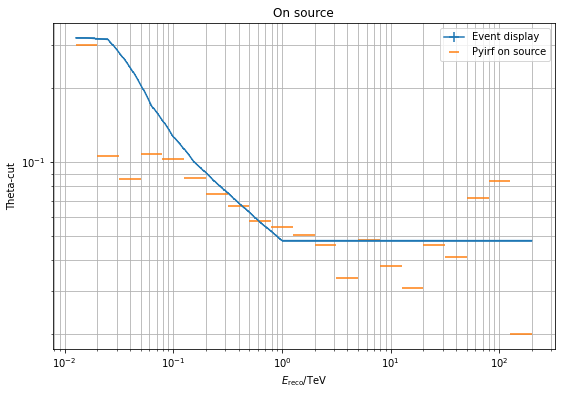

In [5]:
th_cut_pyirf = QTable.read(pyirf_file, hdu='THETA_CUTS')[1:-1]
th_cut_ed, edges = irf_eventdisplay["ThetaCut"].to_numpy()
yerr = irf_eventdisplay["ThetaCut"].errors()
x = bin_center(10**edges)
xerr = np.diff(10**edges) / 2
plt.errorbar(x, th_cut_ed, xerr=xerr, yerr=yerr, label='Event display')

plt.errorbar(
    0.5 * (th_cut_pyirf['low'] + th_cut_pyirf['high']).to_value(u.TeV),
    th_cut_pyirf['cut'].to('deg').value,
    xerr=0.5 * (th_cut_pyirf['high'] - th_cut_pyirf['low']).to_value(u.TeV),
    ls='',
    label='Pyirf on source',
)

plt.legend()
plt.title('On source')
plt.ylabel('Theta-cut')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both")

None # to remove clutter by mpl objects

### G-H cut
[back to top](#Table-of-contents)

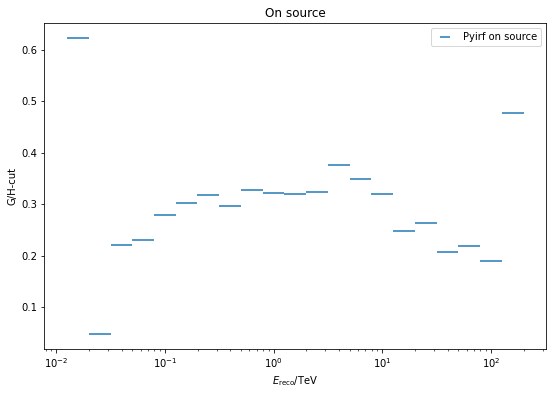

In [6]:
from astropy.table import QTable


gh_cut = QTable.read(pyirf_file, hdu='GH_CUTS')[1:-1]


plt.errorbar(
    0.5 * (gh_cut['low'] + gh_cut['high']).to_value(u.TeV),
    gh_cut['cut'],
    xerr=0.5 * (gh_cut['high'] - gh_cut['low']).to_value(u.TeV),
    ls='',
    label='Pyirf on source',
)

plt.legend()
plt.ylabel('G/H-cut')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.title('On source')
plt.xscale('log')

None # to remove clutter by mpl objects

### Multiplicity cut
[back to top](#Table-of-contents)

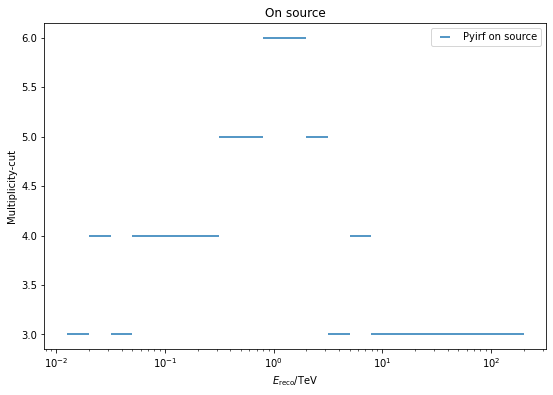

In [7]:
multi_cut = QTable.read(pyirf_file, hdu='MULTIPLICITY_CUTS')[1:-1]

plt.errorbar(
    0.5 * (multi_cut['low'] + multi_cut['high']).to_value(u.TeV),
    multi_cut['cut'],
    xerr=0.5 * (multi_cut['high'] - multi_cut['low']).to_value(u.TeV),
    ls='',
    label='Pyirf on source',
)

plt.legend()
plt.ylabel('Multiplicity-cut')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.title('On source')
plt.xscale('log')

None # to remove clutter by mpl objects

## Differential sensitivity from cuts optimization
[back to top](#Table-of-contents)

In [8]:
def calculate_and_format_sensitivity(pyirf_file):
    # [1:-1] removes under/overflow bins
    sensitivity = QTable.read(pyirf_file, hdu='SENSITIVITY')[1:-1]

    # make it print nice
    sensitivity['reco_energy_low'].info.format = '.3g'
    sensitivity['reco_energy_high'].info.format = '.3g'
    sensitivity['reco_energy_center'].info.format = '.3g'
    sensitivity['relative_sensitivity'].info.format = '.2g'
    sensitivity['flux_sensitivity'].info.format = '.3g'

    for k in filter(lambda k: k.startswith('n_'), sensitivity.colnames):
        sensitivity[k].info.format = '.1f'

    return sensitivity

In [9]:
sensitivity_alltypes = calculate_and_format_sensitivity(pyirf_file)
sensitivity_type1 = calculate_and_format_sensitivity(pyirf_file_event_type_1)
sensitivity_type2 = calculate_and_format_sensitivity(pyirf_file_event_type_2)
sensitivity_type3 = calculate_and_format_sensitivity(pyirf_file_event_type_3)

[3.0448125e-10 1.8950282e-11 6.6297588e-12 1.7283525e-12 8.9006808e-13
 5.6706598e-13 4.0317321e-13 2.9486231e-13 2.3853372e-13 1.8432710e-13
 1.6966531e-13 1.6201049e-13 1.6581575e-13 2.0206027e-13 2.8420655e-13
 4.2212211e-13 6.7550962e-13 1.1628062e-12 1.7931365e-12 2.8415926e-12
 5.5664631e-12]
3.386992594704025e-11 / 3.0448124577198143e-10 = 0.11123813508174034
9.009887336344075e-12 / 1.8950282315577383e-11 = 0.47544871291642066
3.80880491031661e-12 / 6.6297588079133885e-12 = 0.5745012783527446
1.6184152221039736e-12 / 1.7283524871708478e-12 = 0.9363918726747509
9.441586660035717e-13 / 8.900680756665502e-13 = 1.0607712958320792
6.134440725567387e-13 / 5.670659796765121e-13 = 1.0817860611329275
4.512831534945053e-13 / 4.031732087940443e-13 = 1.1193282282926627
3.503934035771506e-13 / 2.948623062295347e-13 = 1.1883289120868095
2.8437801213340097e-13 / 2.385337207703314e-13 = 1.1921920775604302
2.3058712092603263e-13 / 1.843270951455353e-13 = 1.2509670417361742
2.0901524021779382e-13

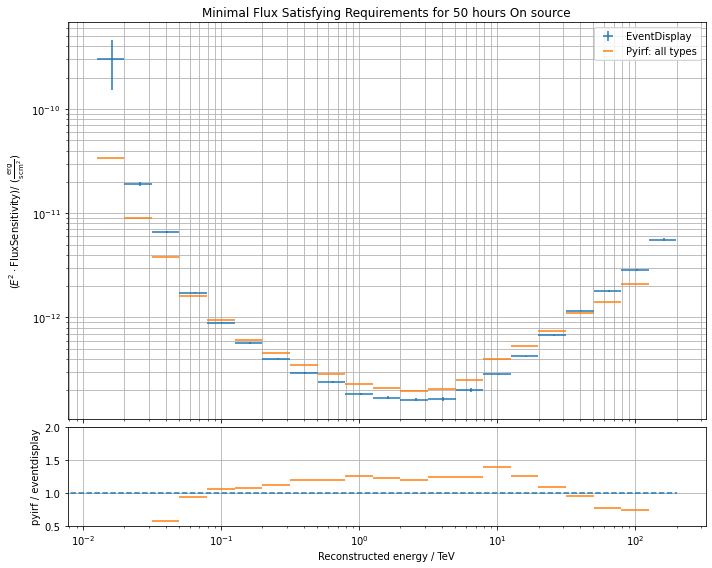

In [10]:
# Get data from event display file
y, edges = irf_eventdisplay["DiffSens"].to_numpy()
yerr = irf_eventdisplay["DiffSens"].errors()
bins = 10**edges
x = bin_center(bins)
width = np.diff(bins)

fig, (ax_sens, ax_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [4, 1]},
    sharex=True, figsize=(10,8)
)

ax_sens.errorbar(
    x,
    y, 
    xerr=width/2,
    yerr=yerr,
    label="EventDisplay",
    ls=''
)

unit = u.Unit('erg cm-2 s-1')

print(y)
def plot_sensitivity(sensitivity, axis, axis_ratio, label, color, y):
    
    e = sensitivity['reco_energy_center']
    w = (sensitivity['reco_energy_high'] - sensitivity['reco_energy_low'])
    s = (e**2 * sensitivity['flux_sensitivity'])


    axis.errorbar(
        e.to_value(u.TeV),
        np.array(s.to_value(unit)),
        xerr=w.to_value(u.TeV) / 2,
        ls='',
        color=color,
        label=label,
    )
    ratios = s.to_value(unit)/y
    for i, y1 in enumerate(s.to_value(unit)):
        print("{} / {} = {}".format(y1, y[i], ratios[i]))
    axis_ratio.plot([0, 200], [1, 1], '--')
    axis_ratio.errorbar(
        e.to_value(u.TeV), np.array(ratios),
        xerr=w.to_value(u.TeV)/2,
        ls='',
        color=color,
    )
    
plot_sensitivity(sensitivity_alltypes, ax_sens, ax_ratio, "Pyirf: all types", "C1", y)

ax_ratio.set_xlabel("Reconstructed energy / TeV")
ax_ratio.set_ylabel('pyirf / eventdisplay')
ax_ratio.grid()
ax_ratio.yaxis.set_major_formatter(ScalarFormatter())

ax_ratio.set_ylim(0.5, 2.0)

# Style settings
ax_sens.set_title('Minimal Flux Satisfying Requirements for 50 hours '+'On source')
ax_sens.set_xscale("log")
ax_sens.set_yscale("log")
ax_sens.set_ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

ax_sens.grid(which="both")
ax_sens.legend()
fig.tight_layout(h_pad=0)
fig.savefig("Sensitivity_onSource.pdf")

None # to remove clutter by mpl objects

inf / 2.1139945014976578e-11 TeV / (cm2 s) = inf cm2 s / TeV
1.2890884419073211e-12 / 5.623529356966066e-12 TeV / (cm2 s) = 0.22923121052270873 cm2 s / TeV
6.05188423092398e-13 / 2.377269041059183e-12 TeV / (cm2 s) = 0.25457296277360286 cm2 s / TeV
2.656031078800563e-13 / 1.0101353295007383e-12 TeV / (cm2 s) = 0.2629381431608092 cm2 s / TeV
1.3035462070164694e-13 / 5.892974881592062e-13 TeV / (cm2 s) = 0.2212034215669862 cm2 s / TeV
1.0009445055518016e-13 / 3.8288167455370515e-13 TeV / (cm2 s) = 0.26142397823518804 cm2 s / TeV
6.06551931366112e-14 / 2.816687897687224e-13 TeV / (cm2 s) = 0.21534225778587338 cm2 s / TeV
6.202720616204394e-14 / 2.186983608057978e-13 TeV / (cm2 s) = 0.2836198951537801 cm2 s / TeV
7.887186470420842e-14 / 1.774947943307735e-13 TeV / (cm2 s) = 0.4443615656537249 cm2 s / TeV
9.958582634777525e-14 / 1.439211607713614e-13 TeV / (cm2 s) = 0.691947075843705 cm2 s / TeV
1.2964812860473864e-13 / 1.3045705185199564e-13 TeV / (cm2 s) = 0.9937993137528914 cm2 s / TeV
1

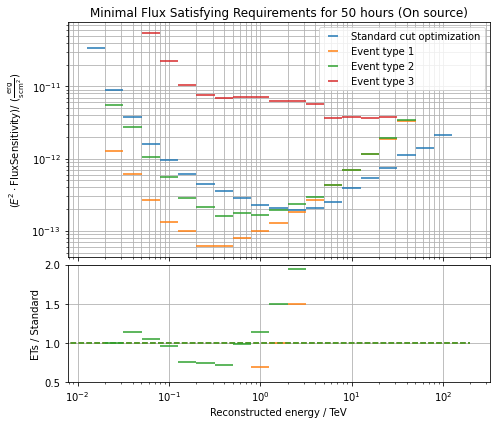

In [11]:
e = sensitivity_alltypes['reco_energy_center']
w = (sensitivity_alltypes['reco_energy_high'] - sensitivity_alltypes['reco_energy_low'])
s = (e**2 * sensitivity_alltypes['flux_sensitivity'])

fig, (ax_sens, ax_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [2, 1]},
    sharex=True, figsize=(7,6)
)

ax_sens.errorbar(
    e.to_value(u.TeV),
    np.array(s.to_value(unit)),
    xerr=w.to_value(u.TeV) / 2,
    ls='',
    label="Standard cut optimization"
)

plot_sensitivity(sensitivity_type1, ax_sens, ax_ratio, "Event type 1", "C1", s)
plot_sensitivity(sensitivity_type2, ax_sens, ax_ratio, "Event type 2", "C2", s)
plot_sensitivity(sensitivity_type3, ax_sens, ax_ratio, "Event type 3", "C3", s)

ax_ratio.set_xlabel("Reconstructed energy / TeV")
ax_ratio.set_ylabel('ETs / Standard')
ax_ratio.grid()
ax_ratio.yaxis.set_major_formatter(ScalarFormatter())

ax_ratio.set_ylim(0.5, 2.0)

# Style settings
ax_sens.set_title('Minimal Flux Satisfying Requirements for 50 hours (On source)')
ax_sens.set_xscale("log")
ax_sens.set_yscale("log")
ax_sens.set_ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

ax_sens.grid(which="both")
ax_sens.legend()
fig.tight_layout(h_pad=0)
fig.savefig("Sensitivity_by_ET_onSource.pdf")

None # to remove clutter by mpl objects

## IRFs
[back to top](#Table-of-contents)

### Effective area
[back to top](#Table-of-contents)

In [12]:
area = QTable.read(pyirf_file, hdu='EFFECTIVE AREA')[0]
area

ENERG_LO [44],ENERG_HI [44],THETA_LO [1],THETA_HI [1],EFFAREA [44]
TeV,TeV,deg,deg,m2
float64,float64,float64,float64,float64
0.0 .. 199.52623149688972,0.012589254117941675 .. inf,0.0,1.0,0.6980854881946933 .. 7366.174890111889


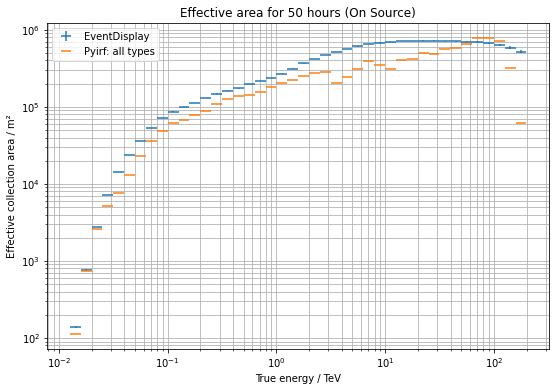

In [14]:
# Data from EventDisplay
y, edges = irf_eventdisplay["EffectiveAreaEtrue"].to_numpy()
yerr = irf_eventdisplay["EffectiveAreaEtrue"].errors()

x = bin_center(10**edges)
xerr = 0.5 * np.diff(10**edges)

plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

def plot_effective_area(pyirf_file, label):

    area = QTable.read(pyirf_file, hdu='EFFECTIVE AREA')[0]

    plt.errorbar(
        0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1],
        area['EFFAREA'].to_value(u.m**2).T[1:-1],
        xerr=0.5 * (area['ENERG_HI'] - area['ENERG_LO']).to_value(u.TeV)[1:-1],
        ls='',
        label=label,
    )

plot_effective_area(pyirf_file, 'Pyirf: all types')
    
# Style settings
plt.title('Effective area for 50 hours (On Source)')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV")
plt.ylabel("Effective collection area / m²")
plt.grid(which="both")
plt.legend()
plt.savefig("EffectiveArea_onSource.pdf")

None # to remove clutter by mpl objects

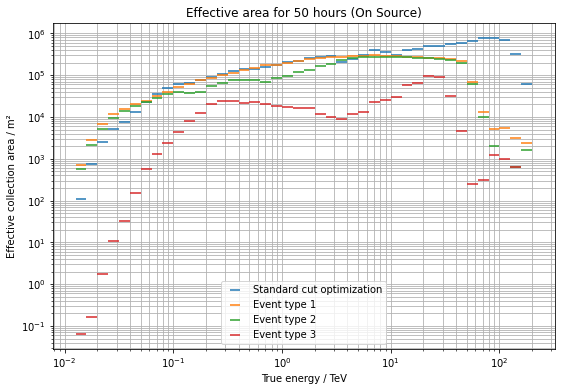

In [15]:
plot_effective_area(pyirf_file, 'Standard cut optimization')
plot_effective_area(pyirf_file_event_type_1, "Event type 1")
plot_effective_area(pyirf_file_event_type_2, "Event type 2")
plot_effective_area(pyirf_file_event_type_3, "Event type 3")
    
# Style settings
plt.title('Effective area for 50 hours (On Source)')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV")
plt.ylabel("Effective collection area / m²")
plt.grid(which="both")
plt.legend()

None # to remove clutter by mpl objects

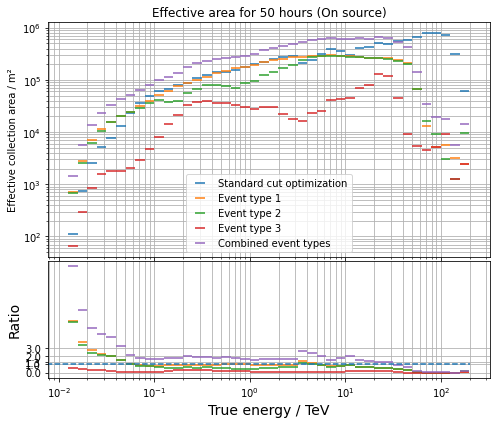

In [16]:
area = QTable.read(pyirf_file, hdu='EFFECTIVE AREA')[0]
y = area['EFFAREA'].to_value(u.m**2).T[1:-1]
x = 0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1]
xerr = -0.5 * (area['ENERG_LO'] - area['ENERG_HI']).to_value(u.TeV)[1:-1]

fig, (axs, axs_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [2, 1]},
    sharex=True,
    figsize=[7,6]
)

axs.errorbar(x, y, xerr=xerr, ls='', label="Standard cut optimization")

def plot_effective_area_all(pyirf_file1, pyirf_file2, pyirf_file3, ref_y):
    area = QTable.read(pyirf_file1, hdu='EFFECTIVE AREA')[0]

    axs.errorbar(
        0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1],
        area['EFFAREA'].to_value(u.m**2).T[1:-1],
        xerr=-0.5 * (area['ENERG_LO'] - area['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Event type 1",
    )
    axs_ratio.errorbar(
        0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1],
        area['EFFAREA'].to_value(u.m**2).T[1:-1]/ref_y,
        xerr=-0.5 * (area['ENERG_LO'] - area['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Event type 1", color="C1"
    )
    
    area2 = QTable.read(pyirf_file2, hdu='EFFECTIVE AREA ONLY GH AND MULTIPLICITY')[0]

    axs.errorbar(
        0.5 * (area2['ENERG_LO'] + area2['ENERG_HI']).to_value(u.TeV)[1:-1],
        area2['EFFAREA'].to_value(u.m**2).T[1:-1],
        xerr=-0.5 * (area2['ENERG_LO'] - area2['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Event type 2",
    )
    axs_ratio.errorbar(
        0.5 * (area2['ENERG_LO'] + area2['ENERG_HI']).to_value(u.TeV)[1:-1],
        area2['EFFAREA'].to_value(u.m**2).T[1:-1]/ref_y,
        xerr=-0.5 * (area2['ENERG_LO'] - area2['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Event type 2", color="C2"
    )
    
    area3 = QTable.read(pyirf_file3, hdu='EFFECTIVE AREA ONLY GH AND MULTIPLICITY')[0]

    axs.errorbar(
        0.5 * (area3['ENERG_LO'] + area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        area3['EFFAREA'].to_value(u.m**2).T[1:-1],
        xerr=-0.5 * (area3['ENERG_LO'] - area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Event type 3",
    )
    axs_ratio.errorbar(
        0.5 * (area3['ENERG_LO'] + area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        area3['EFFAREA'].to_value(u.m**2).T[1:-1]/ref_y,
        xerr=-0.5 * (area3['ENERG_LO'] - area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Event type 3", color="C3"
    )
        
    combined = area['EFFAREA'].to_value(u.m**2).T[1:-1] +area2['EFFAREA'].to_value(u.m**2).T[1:-1] +area3['EFFAREA'].to_value(u.m**2).T[1:-1]    
    axs.errorbar(
        0.5 * (area3['ENERG_LO'] + area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        combined,
        xerr=-0.5 * (area3['ENERG_LO'] - area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Combined event types",
    )
    
    axs_ratio.errorbar(
        0.5 * (area3['ENERG_LO'] + area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        combined/ref_y,
        xerr=-0.5 * (area3['ENERG_LO'] - area3['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label="Combined event types", color="C4"
    )
    
plot_effective_area_all(pyirf_file_event_type_1,pyirf_file_event_type_2, pyirf_file_event_type_3, y)
    
# Style settings
axs_ratio.set_xlabel("True energy / TeV", fontsize=14)
axs_ratio.set_ylabel('Ratio', fontsize=14)
axs_ratio.grid(which="both")
axs_ratio.yaxis.set_major_formatter(ScalarFormatter())
axs_ratio.plot([0, 200], [1, 1], '--')
axs_ratio.set_yticks([0., 1, 1.3, 2, 3])
axs.set_title('Effective area for 50 hours (On source)')
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel("")
axs.set_ylabel("Effective collection area / m²")
axs.grid(which="both")
axs.legend()
fig.tight_layout(h_pad=0)
fig.show()
fig.savefig("EffectiveArea_by_ET_onSource.pdf")

None # to remove clutter by mpl objects

### Point Spread Function
[back to top](#Table-of-contents)

/tmp/ipykernel_140/3106800447.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(phi, r, image)


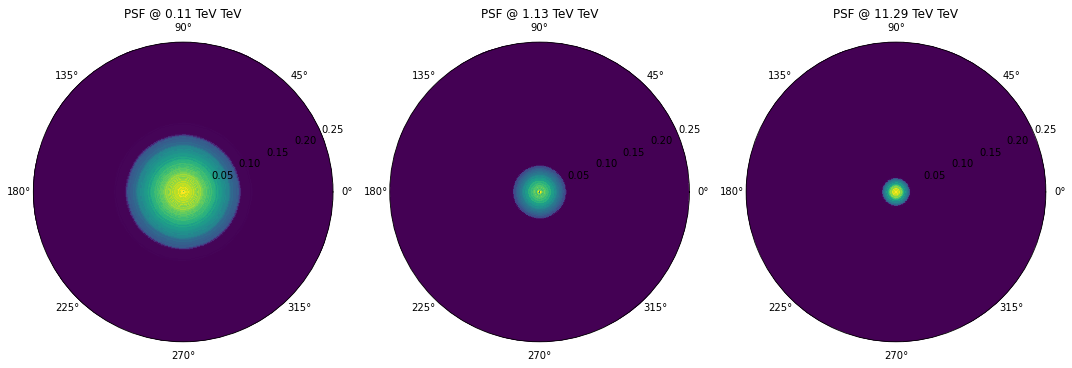

In [17]:
psf_table = QTable.read(pyirf_file_event_type_1, hdu='PSF')[0]
# select the only fov offset bin
psf = psf_table['RPSF'].T[:, 0, :].to_value(1 / u.sr)

offset_bins = np.append(psf_table['RAD_LO'], psf_table['RAD_HI'][-1])
phi_bins = np.linspace(0, 2 * np.pi, 100)

# Let's make a nice 2d representation of the radially symmetric PSF
r, phi = np.meshgrid(offset_bins.to_value(u.deg), phi_bins)

# look at a single energy bin
# repeat values for each phi bin
center = 0.5 * (psf_table['ENERG_LO'] + psf_table['ENERG_HI'])


fig = plt.figure(figsize=(15, 5))
axs = [fig.add_subplot(1, 3, i, projection='polar') for i in range(1, 4)]


for bin_id, ax in zip([10, 20, 30], axs):
    image = np.tile(psf[bin_id], (len(phi_bins) - 1, 1))
    
    ax.set_title(f'PSF @ {center[bin_id]:.2f} TeV')
    ax.pcolormesh(phi, r, image)
    ax.set_ylim(0, 0.25)
    ax.set_aspect(1)
    
fig.tight_layout()

None # to remove clutter by mpl objects

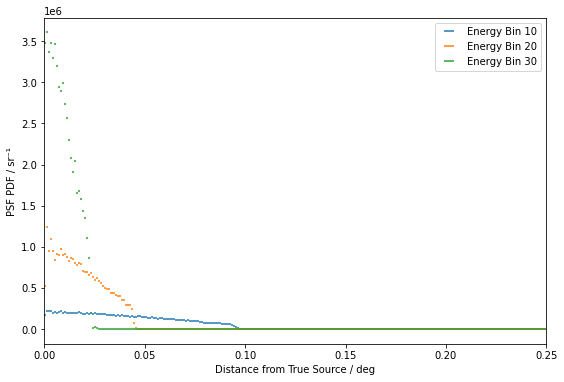

In [18]:
# Profile
center = 0.5 * (offset_bins[1:] + offset_bins[:-1])
xerr = 0.5 * (offset_bins[1:] - offset_bins[:-1])

for bin_id in [10, 20, 30]:
    plt.errorbar(
        center.to_value(u.deg),
        psf[bin_id],
        xerr=xerr.to_value(u.deg),
        ls='',
        label=f'Energy Bin {bin_id}'
    )
    
#plt.yscale('log')
plt.legend()
plt.xlim(0, 0.25)
plt.ylabel('PSF PDF / sr⁻¹')
plt.xlabel('Distance from True Source / deg')

None # to remove clutter by mpl objects

#### Angular resolution
[back to top](#Table-of-contents)

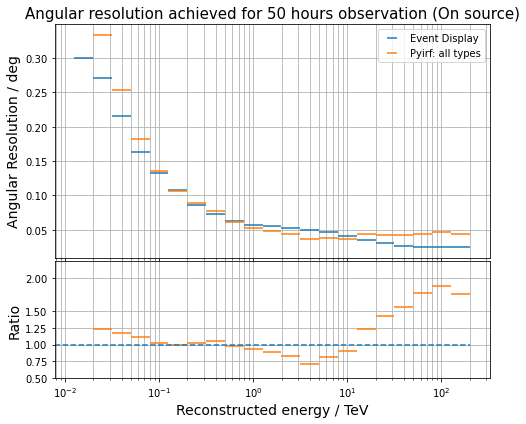

In [19]:
# Data from EventDisplay
y, edges = irf_eventdisplay["AngResEtrue"].to_numpy()
yerr = irf_eventdisplay["AngResEtrue"].errors()
x = bin_center(10**edges)
xerr = np.diff(10**edges) / 2

fig, (axs, axs_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [2, 1]},
    sharex=True,
    figsize=[7,6]
)

axs.errorbar(x, y, xerr=xerr, ls='', label="Event Display")

# pyirf
def plot_ang_res(pyirf_file, axis, axis_ratio, label, color, y_ref):
    ang_res = QTable.read(pyirf_file, hdu='ANGULAR RESOLUTION')[1:-1]

    axis.errorbar(
        0.5 * (ang_res['reco_energy_low'] + ang_res['reco_energy_high']).to_value(u.TeV),
        np.array(ang_res['angular_resolution'].to_value(u.deg)),
        xerr=0.5 * (ang_res['reco_energy_high'] - ang_res['reco_energy_low']).to_value(u.TeV),
        ls='', color=color,
        label=label
    )
    axis_ratio.errorbar(
        0.5 * (ang_res['reco_energy_low'] + ang_res['reco_energy_high']).to_value(u.TeV),
        np.array(ang_res['angular_resolution'].to_value(u.deg)) / y_ref,
        xerr=0.5 * (ang_res['reco_energy_high'] - ang_res['reco_energy_low']).to_value(u.TeV),
        ls='', color=color,
        label=label
    )

plot_ang_res(pyirf_file, axs, axs_ratio, "Pyirf: all types", "C1", y)


axs_ratio.set_xlabel("Reconstructed energy / TeV", fontsize=14)
axs_ratio.set_ylabel('Ratio', fontsize=14)
axs_ratio.grid(which="both")
axs_ratio.yaxis.set_major_formatter(ScalarFormatter())
axs_ratio.plot([0, 200], [1, 1], '--')
axs_ratio.set_ylim(0.5, 2.25)
axs_ratio.set_yticks([0.50, 0.75, 1.0, 1.25, 1.5, 2])

# Style settings
axs.set_title('Angular resolution achieved for 50 hours observation (On source)', fontsize=15)
axs.set_xscale("log")
# axs.set_yscale("log")
axs.set_ylabel("Angular Resolution / deg", fontsize=14)
axs.set_xlabel("")
axs.grid(which="both")
axs.legend()
fig.tight_layout(h_pad=0)

fig.show()
fig.savefig("AngularResolution_onSource.pdf")

None # to remove clutter by mpl objects

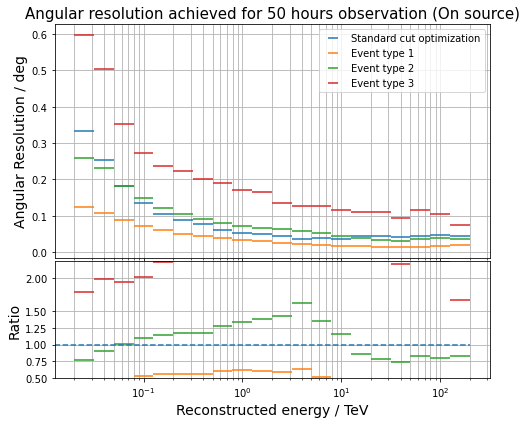

In [20]:
ang_res = QTable.read(pyirf_file, hdu='ANGULAR RESOLUTION')[1:-1]
y = np.array(ang_res['angular_resolution'].to_value(u.deg))

x = 0.5 * (ang_res['reco_energy_low'] + ang_res['reco_energy_high']).to_value(u.TeV)
xerr = 0.5 * (ang_res['reco_energy_high'] - ang_res['reco_energy_low']).to_value(u.TeV)

fig, (axs, axs_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [2, 1]},
    sharex=True,
    figsize=[7,6]
)


axs.errorbar(x, y, xerr=xerr, ls='', label="Standard cut optimization")

plot_ang_res(pyirf_file_event_type_1, axs, axs_ratio, "Event type 1", "C1", y)
plot_ang_res(pyirf_file_event_type_2, axs, axs_ratio, "Event type 2", "C2", y)
plot_ang_res(pyirf_file_event_type_3, axs, axs_ratio, "Event type 3", "C3", y)

axs_ratio.set_xlabel("Reconstructed energy / TeV", fontsize=14)
axs_ratio.set_ylabel('Ratio', fontsize=14)
axs_ratio.grid(which="both")
axs_ratio.yaxis.set_major_formatter(ScalarFormatter())
axs_ratio.plot([0, 200], [1, 1], '--')
axs_ratio.set_ylim(0.5, 2.25)
axs_ratio.set_yticks([0.50, 0.75, 1.0, 1.25, 1.5, 2])

# Style settings
axs.set_title('Angular resolution achieved for 50 hours observation (On source)', fontsize=15)
axs.set_xscale("log")
# axs.set_yscale("log")
axs.set_ylabel("Angular Resolution / deg", fontsize=14)
axs.set_xlabel("")
axs.grid(which="both")
axs.legend()
fig.tight_layout(h_pad=0)

fig.show()
fig.savefig("AngularResolution_by_ET_onSource.pdf")

None # to remove clutter by mpl objects

### Energy dispersion
[back to top](#Table-of-contents)

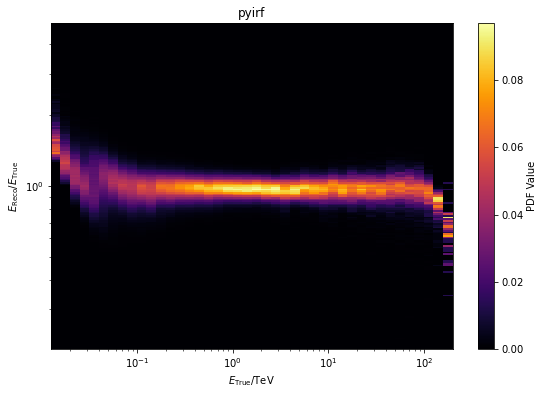

In [21]:
edisp = QTable.read(pyirf_file, hdu='ENERGY DISPERSION')[0]

e_bins = edisp['ENERG_LO'][1:]
migra_bins = edisp['MIGRA_LO'][1:]

plt.title('pyirf')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, edisp['MATRIX'].T[1:-1, 1:-1, 0].T, cmap='inferno')

plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

None # to remove clutter by mpl objects

#### Energy resolution
[back to top](#Table-of-contents)

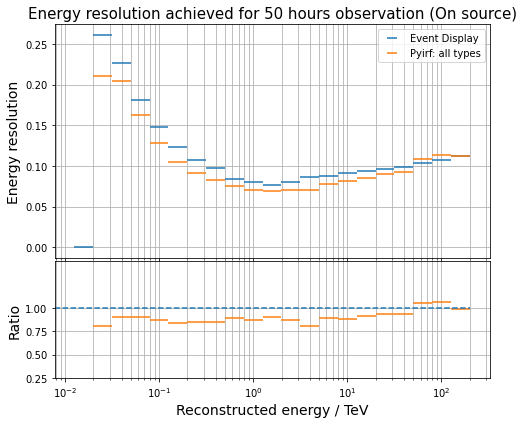

In [23]:
# Data from EventDisplay
y, edges = irf_eventdisplay["ERes"].to_numpy()
yerr = irf_eventdisplay["ERes"].errors()
x = bin_center(10**edges)
xerr = np.diff(10**edges) / 2

fig, (axs, axs_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [2, 1]},
    sharex=True,
    figsize=[7,6]
)

axs.errorbar(x, y, xerr=xerr, ls='', label="Event Display")


def plot_energy_resolution(pyirf_file, label, axis, axis_ratio, color, y_ref):
    # Data from pyirf
    bias_resolution = QTable.read(pyirf_file, hdu='ENERGY BIAS RESOLUTION')[1:-1]

    # Plot function
    axis.errorbar(
        0.5 * (bias_resolution['reco_energy_low'] + bias_resolution['reco_energy_high']).to_value(u.TeV),
        bias_resolution['resolution'],
        xerr=0.5 * (bias_resolution['reco_energy_high'] - bias_resolution['reco_energy_low']).to_value(u.TeV),
        ls='',
        label=label
    )
    axis_ratio.errorbar(
        0.5 * (bias_resolution['reco_energy_low'] + bias_resolution['reco_energy_high']).to_value(u.TeV),
        bias_resolution['resolution'] / y_ref,
        xerr=0.5 * (bias_resolution['reco_energy_high'] - bias_resolution['reco_energy_low']).to_value(u.TeV),
        ls='', color=color,
        label=label
    )
    
plot_energy_resolution(pyirf_file, "Pyirf: all types", axs, axs_ratio, "C1", y)


axs_ratio.set_xlabel("Reconstructed energy / TeV", fontsize=14)
axs_ratio.set_ylabel('Ratio', fontsize=14)
axs_ratio.grid(which="both")
axs_ratio.yaxis.set_major_formatter(ScalarFormatter())
axs_ratio.plot([0, 200], [1, 1], '--')
axs_ratio.set_ylim(0.5, 1.5)
axs_ratio.set_yticks([0.25, 0.50, 0.75, 1.0])

# Style settings
axs.set_title('Energy resolution achieved for 50 hours observation (On source)', fontsize=15)
axs.set_xscale("log")
# axs.set_yscale("log")
axs.set_ylabel(r"Energy resolution", fontsize=14)
axs.set_xlabel("")
axs.grid(which="both")
axs.legend()
fig.tight_layout(h_pad=0)
fig.show()
fig.savefig("EnergyResolution_onSource.pdf")

None # to remove clutter by mpl objects

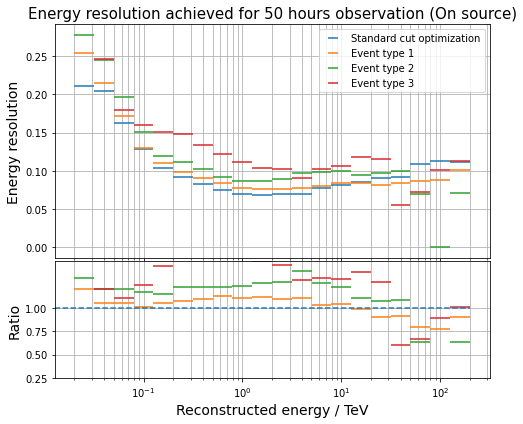

In [24]:
bias_resolution = QTable.read(pyirf_file, hdu='ENERGY BIAS RESOLUTION')[1:-1]
y = bias_resolution['resolution']
x = 0.5 * (bias_resolution['reco_energy_low'] + bias_resolution['reco_energy_high']).to_value(u.TeV)
xerr = 0.5 * (bias_resolution['reco_energy_high'] - bias_resolution['reco_energy_low']).to_value(u.TeV)


fig, (axs, axs_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [2, 1]},
    sharex=True,
    figsize=[7,6]
)

axs.errorbar(x, y, xerr=xerr, ls='', label="Standard cut optimization")

plot_energy_resolution(pyirf_file_event_type_1, "Event type 1", axs, axs_ratio, "C1", y)
plot_energy_resolution(pyirf_file_event_type_2, "Event type 2", axs, axs_ratio, "C2", y)
plot_energy_resolution(pyirf_file_event_type_3, "Event type 3", axs, axs_ratio, "C3", y)


# Style settings
axs_ratio.set_xlabel("Reconstructed energy / TeV", fontsize=14)
axs_ratio.set_ylabel('Ratio', fontsize=14)
axs_ratio.grid(which="both")
axs_ratio.yaxis.set_major_formatter(ScalarFormatter())
axs_ratio.plot([0, 200], [1, 1], '--')
axs_ratio.set_ylim(0.5, 1.5)
axs_ratio.set_yticks([0.25, 0.50, 0.75, 1.0])

axs.set_title('Energy resolution achieved for 50 hours observation (On source)', fontsize=15)
axs.set_xscale("log")
# axs.set_yscale("log")
axs.set_ylabel(r"Energy resolution", fontsize=14)
axs.set_xlabel("")
axs.grid(which="both")
axs.legend()
fig.tight_layout(h_pad=0)
fig.show()
fig.savefig("EnergyResolution_by_ET_onSource.pdf")

None # to remove clutter by mpl objects

### Background rate
[back to top](#Table-of-contents)

/data/magic/users-ciemat/jbernete/anaconda3/envs/event_types/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


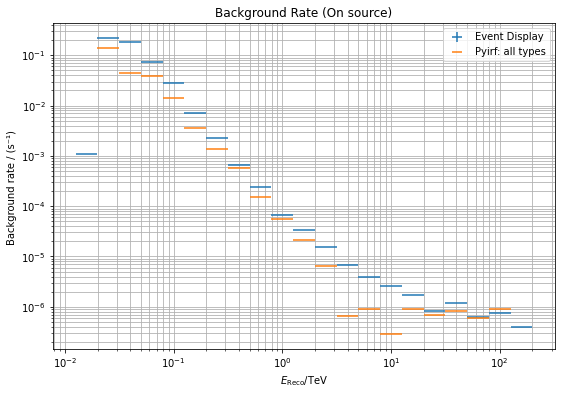

In [25]:
from pyirf.utils import cone_solid_angle

# Data from EventDisplay
y, edges = irf_eventdisplay["BGRate"].to_numpy()
yerr = irf_eventdisplay["BGRate"].errors()
x = bin_center(10**edges)
xerr = np.diff(10**edges) / 2
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="Event Display")

def plot_bg_rate(pyirf_file, label):
    bg_rate = QTable.read(pyirf_file, hdu='BACKGROUND')[0]
    theta_cut = QTable.read(pyirf_file, hdu='THETA_CUTS')

    reco_bins = np.append(bg_rate['ENERG_LO'], bg_rate['ENERG_HI'][-1])

    rate_bin = bg_rate['BKG'].T[:, 0]

    # undo normalization
    rate_bin *= cone_solid_angle(theta_cut['cut'].to('deg'))
    rate_bin *= np.diff(reco_bins)

    plt.errorbar(
        0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI']).to_value(u.TeV)[1:-1],
        rate_bin.to_value(1 / u.s)[1:-1],
        xerr=np.diff(reco_bins).to_value(u.TeV)[1:-1] / 2,
        ls='',
        label=label,
    )

plot_bg_rate(pyirf_file, "Pyirf: all types")

# Style settings
plt.title('Background Rate (On source)')
plt.xscale("log")
plt.xlabel(r"$E_\mathrm{Reco} / \mathrm{TeV}$")
plt.ylabel("Background rate / (s⁻¹) ")
plt.grid(which="both")
plt.legend(loc="best")
plt.yscale('log')
plt.savefig("BackgroundRate_onSource.pdf")


None # to remove clutter by mpl objects

/data/magic/users-ciemat/jbernete/anaconda3/envs/event_types/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/data/magic/users-ciemat/jbernete/anaconda3/envs/event_types/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/data/magic/users-ciemat/jbernete/anaconda3/envs/event_types/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/data/magic/users-ciemat/jbernete/anaconda3/envs/event_types/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


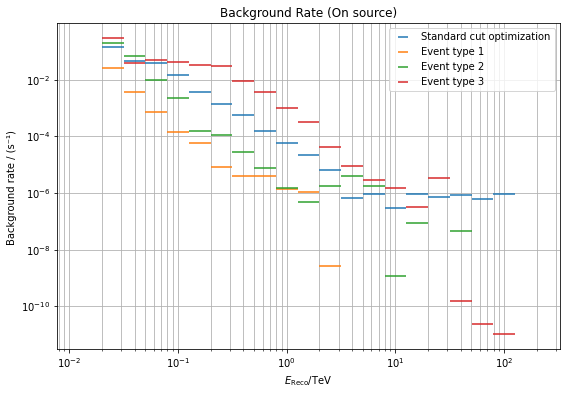

In [26]:
plot_bg_rate(pyirf_file, "Standard cut optimization")
plot_bg_rate(pyirf_file_event_type_1, "Event type 1")
plot_bg_rate(pyirf_file_event_type_2, "Event type 2")
plot_bg_rate(pyirf_file_event_type_3, "Event type 3")


# Style settings
plt.title('Background Rate (On source)')
plt.xscale("log")
plt.xlabel(r"$E_\mathrm{Reco} / \mathrm{TeV}$")
plt.ylabel("Background rate / (s⁻¹) ")
plt.grid(which="both")
plt.legend(loc="best")
plt.yscale('log')
plt.savefig("BackgroundRate_by_ET_onSource.pdf")


None # to remove clutter by mpl objects